In [150]:
from math import *
import numpy as np
import re
from collections import OrderedDict

# def traverse(node,string=''):
#     if isinstance(node, bin_tree):
#         node=node.get_root()  
#         # if unary
#     if node.num_children == 1:
#         string += (node.op)
#         if node.coeff == None:
#             string += ('('+traverse(node.left)+')')
#         else:    
#             string += ('('+str(node.coeff)+'*'+traverse(node.left)+')')
#     # if binary
#     elif node.num_children==2:
#         string += '('+traverse(node.left)
#         string += node.op
#         string += traverse(node.right)+')'
    
#     # if leaf node
#     else:    
#         if node.coeff == None:
#             string += str(node.value)
#         # if constant leaf node, will only have coefficient
#         elif node.value == None:
#             string += str(node.coeff)
#         else:
#             string += '('+str(node.coeff) + '*' + str(node.value)+')'
#     return string

In [182]:
# intermediate_operands = ['sin', 'cos', 'exp', 'np.log', '+', '*']
# unary_operands = ['sin', 'cos', 'np.log', 'exp']
# unary_operands = ['sin', 'cos', 'np.log']
# binary_operands = ['*', '/', '+', '-', '**']
unary_operands = ['sin', 'cos']
binary_operands = ['+']
# terminal_operands = ["var1", "1"]
# terminal_operands = ["c", "var1"]
terminal_operands = ["c", "x", "y", "z"]
COEFF_MAX = 3



In [183]:
class PrintTree:
    """source: https://ebadahmadzadeh.wordpress.com/2014/02/26/how-to-print-a-dictionary-based-tree-in-python/"""
    def printTree(self, tree, d = 0):
        if (tree.num_children == 0):
            if tree.value is None:
                print("\t" * d, tree.index, tree.name, tree.coeff)
            else:
                if tree.coeff is not None:
                    print("\t" * d, tree.index, tree.name, tree.coeff + '*' + tree.value)
                else:
                    print("\t" * d, tree.index, tree.name, tree.value)
        else:
            if tree.coeff is None:
                print( "\t" * d, tree.index, tree.name, tree.op)
            else:
                print( "\t" * d, tree.index, tree.name, tree.op, tree.coeff)
            for i in [tree.left, tree.right]:
                if i != None:
                    self.printTree(i, d+1)
#                 else:
#                     print ("\t" * d, str('(') + "f" + str(')'))

In [184]:
for i in range(100):
    n1 = node(None, 1, "root")
    p = PrintTree()
    generate_tree(n1, [0.2, 0.4, 0.4], 0.08)
#     eval(traverse(n1))
    try:
        eval(traverse(n1))
    except:
        print(n1)
        print(traverse(n1))
        break
#     print(n1)
#     print(traverse(n1))
#     print(p.printTree(n1))
#     print(n1)

TypeError: __init__() takes from 2 to 3 positional arguments but 4 were given

In [450]:
TEST=False #Toggle if you want real numbers for coeffs
import copy
class bin_tree():
    def __init__(self, delta):
        self.root = node("root")
        self.delta = delta
        self.num_nodes = 0
        self.node_list = []
        self.coeff_list = []
        
    def generate_tree(self, node, c):
        """
        generates tree recursively from a starter node
        
        :param node: node object 
        
        :param c: array containing probabilities: [P(0 children), P(Unary), P(Binary)]
        
        :param delta: amount by which c parameters increase/decrease per each level of tree
        
        :return out: String containing either None or "constant" - used to check if subtree is 
        a root node with a constant
        """
        node.probs = c
        
        out = None # variable that tells whether node was constant or variable
        self.num_nodes += 1
        node.index = self.num_nodes
        self.node_list.append(node)
        r = np.random.rand()
        #decrease p(double branch) while
        #increase p(no branch)
        c = copy.deepcopy(c)
        c[0] += self.delta
        c[1] -= self.delta/2
        c[2] -= self.delta/2
        # no operands
        if r < c[0]:
            node.num_children = 0
#             node.coeff = np.random.uniform(coeff_max)
            val = np.random.choice(terminal_operands)
            # If a constant is chosen as a leaf node, then the c {index of node} is created
            if val == "c":    
                node.value = None
                if TEST:
                    node.coeff = val + str(node.index)
                else:
                    node.coeff = np.random.uniform(COEFF_MAX)
                out = "constant"
            else:
                node.value = val
        # unary operation
        elif r > c[0] and (r - c[0]) < c[1]:
            node.init_left()
            node.num_children = 1
            node.op = np.random.choice(unary_operands)
#             node.coeff = np.random.uniform(coeff_max)
            self.generate_tree(node.left, c)
        # binary
        else:
            node.init_left()
            node.init_right()
            node.num_children = 2
            node.op = np.random.choice(binary_operands)
            left = self.generate_tree(node.left, c) 
            right = self.generate_tree(node.right, c)
            # If the left and right children are constants, then convert current node into leaf node
            if left == "constant" and right == "constant":
                # erase children and assign evaluated value 
                node.value = None
                if TEST:
                    node.coeff = "c" + str(node.index)
                else:
                    node.coeff = eval(str(node.left.coeff)+node.op+str(node.right.coeff))
                out = "constant"
                node.left=None
                node.right=None
                node.num_children = 0
                
            # if one branch is constant and operator is '*', store constant
            # as attribute of other branch, and replace current node with 
            # the child node. 
            elif (left == "constant" or right == "constant") and (node.op == "*" or node.op == "/"):
                if left == "constant":
                    if TEST:
                        node.right.coeff = 'c'+str(node.index)
                    else:
                        node.right.coeff = np.random.uniform(COEFF_MAX)
                    node.right.parent = node.parent
                    # parent node points to child of current node
                    # so that child can replace current node
                    if node.name != "root":
                        if node.name == "left":
                            node.parent.left = node.right
                        else:
                            node.parent.right = node.right
                    node.right.name = node.name
                    node.right.index = node.index
                else:
                    if TEST:
                        node.left.coeff = 'c'+str(node.index)
                    else:
                        node.left.coeff = np.random.uniform(COEFF_MAX)
                    node.left.parent = node.parent
                    if node.name != "root":
                        if node.name == "left":
                            node.parent.left = node.left
                        else:
                            node.parent.right = node.left
                    node.left.name = node.name
                    node.left.index = node.index
        
            # If operator is * or /, then combine the coefficients of both branches
            elif (left != "constant" and right != "constant") and (node.op == "*" or node.op == "/"):
                node.coeff = "c"+str(node.index)
                node.left.coeff = None
                node.right.coeff = None

        self.reorder_whole_tree()        
        return out
            
    def get_root(self):
        return self.root 
            
    def __repr__(self):
        return self.traverse(self.get_root())
    
    def print_tree(self):
        pass
    
    def del_subtree(self, node):
        if node.name == "left":
            node.parent.left = None
        elif node.name == "right":
            node.parent.right = None
        self.reorder_whole_tree()
    
    def mutate_node(self, n):
        """takes in either a node or node index, and constructs
        a new tree from that point."""
        if isinstance(n, node):
            self.generate_tree(n, n.probs)
        elif isinstance(n, int):
            self.generate_tree(self.node_list[n], self.node_list[n].probs)
        self.reorder_whole_tree()

    def traverse(self, node=None, string=""):
        if node is None:
            node = self.get_root()
        if node.num_children == 1:
            string += (node.op)
            if node.coeff == None:
                string += ('('+self.traverse(node.left)+')')
            else:    
                string += ('('+str(node.coeff)+'*'+self.traverse(node.left)+')')
        # if binary
        elif node.num_children==2:
            string += '('+self.traverse(node.left)
            string += node.op
            string += self.traverse(node.right)+')'

        # if leaf node
        else:    
            if node.coeff == None:
                string += str(node.value)
            # if constant leaf node, will only have coefficient
            elif node.value == None:
                string += str(node.coeff)
            else:
                string += '('+str(node.coeff) + '*' + str(node.value)+')'
        return string
    
    def index_tree(self, node):
        """depth wise travels down tree and indexes each node. returns list of nodes in same order"""
        self.node_list.append(node)
        node.index = self.num_nodes
        self.num_nodes += 1
        for i in [node.left, node.right]:
            if i is not None:
                self.index_tree(i)
                
    def reorder_whole_tree(self):
        self.num_nodes = 0
        self.node_list = []
        self.index_tree(self.get_root())   
        
    def mse_fitness(self, data, y):
        """Uses mean square error to generate a fitness score
        Use for tuning coeffs after functional form determined"""
        f = 0
        # find all columns that are in tree
        datacols=data.columns
        # Get subset of data with only these 
        
        text = self.traverse()
        # Create a sorted list of variables that are present in function
        x = [(text.find(i), i) for i in datacols]
        # sort vars by order of appearance from left to right
#         x.sort(key=lambda x: x[0])
        vars_in_equation = [i[1] for i in x]
#         #create data subset 
#         subset = data[vars_in_equation]
        ind = 0
        for i, row in data.iterrows():
            text_c = text
            for var in vars_in_equation:
                text_c = text_c.replace(var, str(data[var][i]))
            
            try:
                y_pred = eval(text_c)
                (y[i]-y_pred)**2
            except:
                print(self.traverse())
                print(self.node_list)
                print(self.get_root().num_children)
                raise
            err = (y[i]-y_pred)**2
            f += err
        mean_error = f/len(data)
        self.fitness = 1000*(1/(1+mean_error))
        return self.fitness
    
    def var_fitness(self, data, y):
        """Uses F-test to generate fitness score
        Use for determining functional form"""
        pass
    
    def calc_row(self, datarow):
        """predicts y for a row of data"""
        pass
    
    #list of coeffs
    # delete node function
    # maintain s ame coeffs for c when deleting node

In [451]:
class node():
    
#     def __init__(self, index, name, parent=None):
#         self.name = name
#         self.num_children=0
#         self.index=index
#         self._left=None
#         self._right=None
#         self._op=None
#         self.coeff=None
#         self._value = None
#         self.parent = parent
        
#     def init_left(self, index):
#         left_node = node(index, "left", parent=self)
#         self.left = left_node
#         self.num_children += 1
        
#     def init_right(self, index):
#         right_node = node(index, "right", parent=self)
#         self.right = right_node
#         self.num_children += 1 


    def __init__(self, name, parent=None):
        self.name = name
        self.num_children=0
        self.index=None
        self._left=None
        self._right=None
        self._op=None
        self.coeff=None
        self._value = None
        self.probs = None
        self.parent = parent
        
    def init_left(self):
        left_node = node("left", parent=self)
        self.left = left_node
        self.num_children += 1
        
    def init_right(self):
        right_node = node("right", parent=self)
        self.right = right_node
        self.num_children += 1 
    
    @property    
    def left(self):
        return self._left
    
    @property    
    def right(self):
        return self._right
    
    @property    
    def op(self):
        return self._op
    
    @property    
    def value(self):
        return self._value
    
    @value.setter
    def value(self, val):
        self._value = val
    
    @left.setter
    def left(self, node):
        self._left = node
    
    @right.setter
    def right(self, node):
        self._right = node

    @op.setter
    def op(self, op):
        self._op = op
        
    def __repr__(self):
        if self.num_children > 0:
            return "(left: {}, op: {}, right: {})".format(
                self.left, self.op, self.right)
        return "{}*{}".format(self.coeff, self.value)

In [446]:
for i in range(10000):
    a = bin_tree(delta=0.12)
    c=[0.1, 0.2]
    c.append(1-sum(c))
    a.generate_tree(a.get_root(), c)
    a.reorder_whole_tree()
    p = PrintTree()
#     print(eval(a.traverse()))
    eval(a.traverse())


TypeError: only size-1 arrays can be converted to Python scalars

In [418]:
p.printTree(a.get_root())

 0 root sin
	 1 left +
		 2 left +
			 3 left +
				 4 left 2.4895128827846027
				 5 right y
			 6 right y
		 7 right z


In [419]:
a.mutate_node(0)

In [420]:
p.printTree(a.get_root())

 0 root sin
	 1 left +
		 2 left cos
			 3 left z
		 4 right x


In [421]:
# a.generate_tree(a.node_list[19], [0.1, 0.1, 0.8])

In [422]:
p.printTree(a.get_root())

 0 root sin
	 1 left +
		 2 left cos
			 3 left z
		 4 right x


In [423]:
#now to make the swap

a = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
a.generate_tree(a.get_root(), c)
a.reorder_whole_tree()
p.printTree(a.get_root())

b = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
b.generate_tree(b.get_root(), c)
b.reorder_whole_tree()
p.printTree(b.get_root())

 0 root +
	 1 left +
		 2 left y
		 3 right +
			 4 left +
				 5 left 2.2412179277272664
				 6 right +
					 7 left +
						 8 left 2.6171392654318657
						 9 right z
					 10 right y
			 11 right +
				 12 left 2.220287866235833
				 13 right y
	 14 right +
		 15 left x
		 16 right x
 0 root +
	 1 left +
		 2 left y
		 3 right +
			 4 left 3.7254146787751203
			 5 right y
	 6 right x


In [424]:
def swap_subtrees(tree1, tree2):
    """randomly selects two subtrees and swaps"""
    choice1 = np.random.choice(tree1.node_list)
    choice2 = np.random.choice(tree2.node_list)
#     print("index of node from tree1: {}, repr: {}\n".format(choice1.index, choice1))
#     print("index of node from tree2: {}, repr: {}\n".format(choice2.index, choice2))
    swap_parents(choice1, choice2, tree1, tree2)
    # re-index each node in the tree
    tree1.reorder_whole_tree()
    tree2.reorder_whole_tree()
    
    
def swap_parents(node1, node2, tree1, tree2):
    """remaps the parents of two randomly selected nodes"""
    
    parent_node1, left_node1, right_node1, val_node1, coeff_node1, op_node1, num_children_node1, name_node1 = get_relatives(node1)
    parent_node2, left_node2, right_node2, val_node2, coeff_node2, op_node2, num_children_node2, name_node2 = get_relatives(node2)
    
    #update indeces
    # get parents of nodes
    d = int(node1.index)
    e = int(node2.index)
    p1 = tree1.node_list[d].parent
    p2 = tree2.node_list[e].parent

    node1.coeff = coeff_node2
    node1.value = val_node2
    node1.left = left_node2
    node1.right = right_node2
    node1.op = op_node2
    node1.num_children = num_children_node2
    
    node2.coeff = coeff_node1
    node2.value = val_node1
    node2.left = left_node1
    node2.right = right_node1
    node2.op = op_node1
    node2.num_children = num_children_node1 
    
    #make nodes point to new parents
    node1.parent = p1
    node2.parent = p2
    
def get_relatives(node):
    return copy.deepcopy([node.parent, node.left, node.right, node.value, node.coeff, node.op, node.num_children, node.name])


In [425]:
# c = copy.deepcopy(a)
# d = copy.deepcopy(b)

In [426]:
a = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
a.generate_tree(a.get_root(), c)
a.reorder_whole_tree()
p.printTree(a.get_root())

b = bin_tree(delta=0.10)
c=[0.1, 0.2]
c.append(1-sum(c))
b.generate_tree(b.get_root(), c)
b.reorder_whole_tree()
p.printTree(b.get_root())

 0 root +
	 1 left z
	 2 right x
 0 root +
	 1 left +
		 2 left +
			 3 left z
			 4 right +
				 5 left 2.56596015882272
				 6 right z
		 7 right y
	 8 right y


In [427]:
print(a)
#before
print("a:")
p.printTree(a.get_root())
print("b:")
p.printTree(b.get_root())


#after
swap_subtrees(a, b)
print("after:\n")
print("a:")
p.printTree(a.get_root())
print("b:")
p.printTree(b.get_root())
print(a.traverse())

(z+x)
a:
 0 root +
	 1 left z
	 2 right x
b:
 0 root +
	 1 left +
		 2 left +
			 3 left z
			 4 right +
				 5 left 2.56596015882272
				 6 right z
		 7 right y
	 8 right y
after:

a:
 0 root +
	 1 left 2.56596015882272
	 2 right x
b:
 0 root +
	 1 left +
		 2 left +
			 3 left z
			 4 right +
				 5 left z
				 6 right z
		 7 right y
	 8 right y
(2.56596015882272+x)


In [428]:
from graphviz import Digraph


dot = Digraph(comment="tree1")
print(dot)

// tree1
digraph {
}


In [429]:
dot.node("A", "a")
dot.node("B", "b")
dot.node("C", "c")
dot.node("D", "d")
dot.node("E", "e")
dot.edge("A", "B", constraint='false')
dot.edge("C", "D")
dot.edge("A", "C")
dot.edge("C", "E")
# dot.edges(["AB", "CD", "AC", "CE"])


In [430]:
print(dot.source)

// tree1
digraph {
	A [label=a]
	B [label=b]
	C [label=c]
	D [label=d]
	E [label=e]
	A -> B [constraint=false]
	C -> D
	A -> C
	C -> E
}


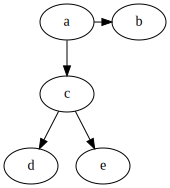

In [431]:
dot

In [432]:
def plot_tree(tree, show_coeff=True, render=False, render_format='pdf', name="test"):
    """takes in tree & creates graphviz (DOT language graph description). 
    
    :param tree: Tree you want to visualize
    
    :param show_coeff: displays coefficients on nodes that have them
    
    :param render: exports the graph image if True
    
    :param render_format: Can choose png, pdf, svg, etc.
    
    :param name: Name of exported model
    """
    
    root = tree.get_root()
    
    dot = Digraph(comment="tree")
    dot.attr(rank='min')
    # Create the nodes
    for n in tree.node_list:
        # if node is not leaf node, only display the operation (and coeff if applicable)
        if n.num_children > 0:
            if show_coeff:
                if n.coeff is not None:
                    dot.node(str(n.index), str(n.coeff)+'\n'+str(n.op))
                else:
                    dot.node(str(n.index), n.op)
            else:
                dot.node(str(n.index), n.op)
        # if leaf node, then display either the coeff, value, or coeff * value.
        # Current implementation of nodes makes so that each node must contain either
        # a constant coefficient or a variable, or both
        else:
            if n.coeff is not None and n.value is None:
                dot.node(str(n.index), str(n.coeff))
            elif n.coeff is not None and n.value is not None:
                dot.node(str(n.index), str(n.coeff)+'*'+str(n.value))
            elif n.coeff is None and n.value is not None:
                dot.node(str(n.index), str(n.value))
    
    # For each node in tree, draw edges to its children
    for n in tree.node_list:
        if n.num_children > 0:
            if n.left is not None:
                dot.edge(str(n.index), str(n.left.index))
            if n.right is not None:
                dot.edge(str(n.index), str(n.right.index))
    
    # Export & display tree in separate window            
    if render:
        dot.format=render_format
        dot.render('test-output/{}'.format(name), view=True)  
    
    return dot
                
    

In [433]:
j = plot_tree(a, render=True, name="test-tree", render_format='png')

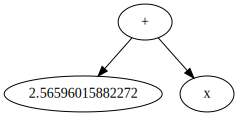

In [434]:
j

In [435]:
a

(2.56596015882272+x)

In [436]:
j.render('test-output/test-tree1.gv', view=True)  

'test-output\\test-tree1.gv.png'

In [437]:
j.format='png'
j.render('test-output/test-tree1', view=True)  

'test-output\\test-tree1.png'

In [458]:
#now must define a cycle function
MATE=0.4            #proportion of total population chosen to mate
MUTATE=0.5          #proportion of offspring that mutate
INDIVIDUALS=100     #minimum number of individuals in a population
#First define the population

class Population:
    def __init__(self, individuals, data, y):
        self.individuals=individuals
        if len(individuals) < INDIVIDUALS:
            self.pop_size=INDIVIDUALS
        else:
            self.pop_size=len(individuals)
        self.data = data
        self.y = y
        # Calculate fitness scores of initial population
        self.scores = [individual.mse_fitness(self.data, self.y) 
             for individual in individuals]
        self.best_ind = np.where(self.scores == np.max(self.scores))[0][0]
        # used to compare best score of previous population to new population
        self.last_best_func = self.individuals[self.best_ind]
        
    def get_best_func(self):
        # Return current best candidate function
        return self.individuals[self.best_ind]
        
    def new_pop(self, scores):
        # Random weighted resampling of current population based on fitness
        sum1 = np.sum(scores)
        prob=scores/sum1
        new_pop = np.random.choice(self.individuals, self.pop_size, p=prob, replace=True)
        return new_pop
        
    def cycle(self):
        new_pop = self.new_pop(self.scores)
        # creates deep copies of chosen individuals to make new population
        self.individuals = [copy.deepcopy(individual) for individual in new_pop]
        # If mut_offspring is set to mutate only on offspring
        mut_offspring=False
        if mut_offspring:
            mutate_ind = self.mate()
        else:
            # mutate whole population
            self.mate()
            mutate_ind = range(self.pop_size)
        if len(mutate_ind) > 0:
            self.mutate(mutate_ind)
        self.scores = [individual.mse_fitness(self.data, self.y) 
             for individual in self.individuals]
        current_best_ind = np.where(self.scores == np.max(self.scores))[0][0]
        worst_score_ind = np.where(self.scores == np.min(self.scores))[0][0]
        # If best score of current pop < previous pop, replace worst performing
        # candidate with previous best candidate
        if self.last_best_func.mse_fitness(self.data, self.y) > self.scores[current_best_ind]:
            self.scores[worst_score_ind] = self.last_best_func.mse_fitness(self.data, self.y)
            self.individuals[worst_score_ind] = self.last_best_func
            self.best_ind = worst_score_ind
        else:
            self.best_ind = current_best_ind
        self.last_best_func = self.individuals[self.best_ind]

    def mate(self):
        num_to_mate = int(len(self.individuals)*MATE)
        if num_to_mate >= 2:
            if num_to_mate % 2 == 1:
                num_to_mate += 1    # Makes sure there is even number of parents
            mating_ind = np.random.choice(len(self.individuals), num_to_mate, replace=False)
            for i in range(len(mating_ind)//2):
                swap_subtrees(self.individuals[2*i], self.individuals[2*i+1])
            return mating_ind
        return None
                
    def mutate(self, mutate_ind):
        num_to_mutate = int(len(mutate_ind)*MUTATE)
        mutate_ind = np.random.choice(mutate_ind, num_to_mutate, replace=False)
        if len(mutate_ind) > 0:
            for i in mutate_ind:
                mut_choice = np.random.choice(self.individuals[i].node_list) # randomly choose a node to mutate
                self.individuals[i].mutate_node(mut_choice)
    
    @staticmethod
    def generate_individuals(n, num_vars, coeff_min, coeff_max, exp_min, exp_max, operators):
        """
        Static method for generating initial population of size n from 
        a dataset with num_vars variables. Coefficient and exponential values of 
        chromosomes are randomly generated within a user-specified range. operators argument 
        contains list of strings that represent operators that can be used e.g. ['+', '-', '*'].
        """
        indiv = []
        if num_vars > 1 and len(operators) == 0:
            raise ValueError("no operators")
        for i in range(n):
            l = [np.random.uniform(low=coeff_min, high=coeff_max) for _ in range(num_vars)]
            a = [np.random.randint(low=exp_min, high=exp_max) for _ in range(num_vars)]
            m = np.random.choice(operators, len(l)-1)
            indiv.append(Individual(l, a, m))
        return indiv


In [390]:
s = "a b c d"
d = ["a", "c"]
any(x in str for x in d)

TypeError: argument of type 'type' is not iterable

In [313]:
match = x for x in d if x in s

SyntaxError: invalid syntax (<ipython-input-313-f12432e5bc69>, line 1)

In [314]:
match.next()

AttributeError: 'generator' object has no attribute 'next'

AttributeError: 'str' object has no attribute 'next'

In [149]:
import re
from collections import OrderedDict

text = "{var1}*{var2}"
vare = ["var2", "var1"]
x = [(text.find(i), i) for i in vare]
x.sort(key=lambda x: x[0])
[i[1] for i in x]

['var1', 'var2']

In [180]:
import pandas as pd
x = np.random.normal(size=6)
y = np.random.normal(size=6)
z = np.random.normal(size=6)
data = pd.DataFrame(np.stack([x,y,z], axis=1), columns=['x','y','z'])
out = x*y*z
# pd.DataFrame.from_items(('x',x),('y',y),('z',z))

In [172]:
data[['x','y']]

,x,y
0,0.185329,-0.428953
1,0.963372,0.052529
2,0.105596,1.647807
3,-2.289425,-1.072307
4,-0.167720,-0.185245
5,-0.926094,2.006546


In [170]:
[i, v for i,v  in enumerate(data)]

SyntaxError: invalid syntax (<ipython-input-170-10603419911c>, line 1)

In [171]:
[i for i in enumerate(data)]

[(0, 'x'), (1, 'y'), (2, 'z')]

In [411]:
for index, row in data.iterrows():
    print(index, row)
ddd = b.__repr__()
print(ddd)
da = ddd.replace("z", "asdf")
print(da)

0 x    1.163445
y   -0.125465
z    0.487278
Name: 0, dtype: float64
1 x    0.989796
y   -0.097551
z    0.805215
Name: 1, dtype: float64
2 x   -0.381886
y   -0.700889
z    1.974620
Name: 2, dtype: float64
3 x    1.110349
y   -0.222549
z   -0.369666
Name: 3, dtype: float64
4 x   -0.705496
y   -0.765244
z    0.309839
Name: 4, dtype: float64
5 x   -0.507317
y    0.334338
z    1.626804
Name: 5, dtype: float64
(sin((((y+1.2728501873998646)+x)+(y+x)))+(y+y))
(sin((((y+1.2728501873998646)+x)+(y+x)))+(y+y))


In [459]:
for i in range(1000):
    b.mse_fitness(data, y)

In [460]:
#test to initialize Population
c=[0.1, 0.2]
c.append(1-sum(c))
individuals=[]
for i in range(1000):
    a=bin_tree(delta=0.12)
    a.generate_tree(a.get_root(), c)
    individuals.append(a)
pop = Population(individuals, data, out)

In [461]:
#test cycle
pop.cycle()

In [379]:
a

2.714358861103283

In [380]:
b

((x+((y+z)+(x+((1.7206374831977884+(2.476558580004338+y))+x))))+cos((3.1410354443450763+z)))

In [382]:
b.node_list[0].probs

[0.1, 0.2, 0.7]